## Predictions : Tree based models

### working with the prediction pipeline for the tree based models only

In [1]:
#------------autoreloader
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
#---------------importing the src functions
from src.data.load_data import load_data, get_info, get_nan, get_shape, save_data
from src.models.split_data import data_split
from src.models.pred_plot_trees import plot_and_pred_train, best_model_pred, other_model_pred

In [4]:
#--------------df_train path
df_train_path = '../../data/preprocessed/trees/train.csv'
df_train_path

'../../data/preprocessed/trees/train.csv'

In [5]:
#--------------df_test path
df_test_path = '../../data/preprocessed/trees/test.csv'
df_test_path

'../../data/preprocessed/trees/test.csv'

In [6]:
#-------------loading and veryfying the both
df_train = load_data(df_train_path)
df_train.head()

,Source,Destination,Total_Stops,Price,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
0,2,2,0,3897,1,0,0,0,24,3,22,20,1,10,2
1,1,1,2,7662,0,0,0,0,1,5,5,50,13,15,7
2,0,0,2,13882,0,1,0,0,9,6,9,25,4,25,19
3,1,1,1,6218,1,0,0,0,12,5,18,5,23,30,5
4,2,2,1,13302,1,0,0,0,1,3,16,50,21,35,4


In [7]:
df_test = load_data(df_test_path)
df_test.head()

,Source,Destination,Total_Stops,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
0,0,0,1,0,1,0,0,6,6,17,30,4,25,10
1,1,1,1,1,0,0,0,12,5,6,20,10,20,4
2,0,0,1,0,1,0,1,21,5,19,15,19,0,23
3,0,0,1,0,0,1,0,21,5,8,0,21,0,13
4,2,2,0,0,0,1,0,24,6,23,55,2,45,2


In [8]:
#--------------null values in both
nan_values_train = get_nan(df_train)
nan_values_train

Source                       0
Destination                  0
Total_Stops                  0
Price                        0
Airline_IndiGo               0
Airline_Jet Airways          0
Airline_other                0
Additional_Info_Some info    0
Date_of_Journey_day          0
Date_of_Journey_month        0
Dep_Time_hour                0
Dep_Time_minute              0
Arrival_Time_hour            0
Arrival_Time_minute          0
Duration_in_hours            0
dtype: int64

In [9]:
nan_values_test = get_nan(df_test)
nan_values_test

Source                       0
Destination                  0
Total_Stops                  0
Airline_IndiGo               0
Airline_Jet Airways          0
Airline_other                0
Additional_Info_Some info    0
Date_of_Journey_day          0
Date_of_Journey_month        0
Dep_Time_hour                0
Dep_Time_minute              0
Arrival_Time_hour            0
Arrival_Time_minute          0
Duration_in_hours            0
dtype: int64

In [10]:
#-------------------splitting the data : train
X_train, X_test, y_train, y_test = data_split(df_train, price = 'Price')

In [11]:
#------------------veryfying through the shape
print(f"{X_train.shape} : {y_train.shape} : {X_test.shape} : {y_test.shape}")

(8012, 14) : (8012,) : (2671, 14) : (2671,)


In [12]:
#------------------splitting the data : test
X_eval = data_split(df_test, price = None)

In [13]:
#------------------veryfying it
X_eval.head()

,Source,Destination,Total_Stops,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
0,0,0,1,0,1,0,0,6,6,17,30,4,25,10
1,1,1,1,1,0,0,0,12,5,6,20,10,20,4
2,0,0,1,0,1,0,1,21,5,19,15,19,0,23
3,0,0,1,0,0,1,0,21,5,8,0,21,0,13
4,2,2,0,0,0,1,0,24,6,23,55,2,45,2


In [14]:
#----------------X_train.head() for additional verification
X_train.head()

,Source,Destination,Total_Stops,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
752,0,0,1,1,0,0,0,27,5,16,0,21,0,5
7431,4,4,0,0,0,1,0,6,5,8,20,10,35,2
5478,1,1,1,0,1,0,0,12,6,18,55,19,50,24
3445,0,0,1,0,1,0,0,6,6,11,30,4,25,16
9380,2,2,0,0,1,0,0,18,6,7,10,10,10,3


### --------------predictions and evaluations : train data first------------

In [15]:
#------------------1. Decision tree
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
model_path_dtr = '../../saved_models/trees/dtr.pkl'

r2 score : 0.6940618426307237
MAE : 802.3841257955822
RMSE : 2499.9026880058213
MSE : 6249513.449498731


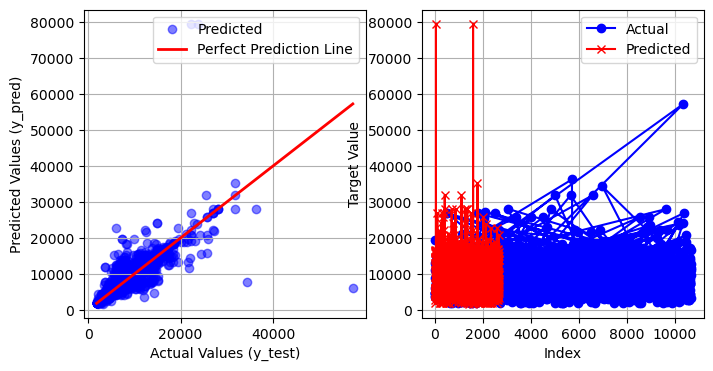

In [23]:
plot_and_pred_train(X_train, X_test, y_train, y_test, model = dtr, model_path = model_path_dtr)

In [17]:
#-----------------------2. Random forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [21]:
model_path_rfr = '../../saved_models/trees/rfr.pkl'
model_path_rfr

'../../saved_models/trees/rfr.pkl'

r2 score : 0.8377712562295336
MAE : 705.1802554420495
RMSE : 1820.4140669887286
MSE : 3313907.375290443


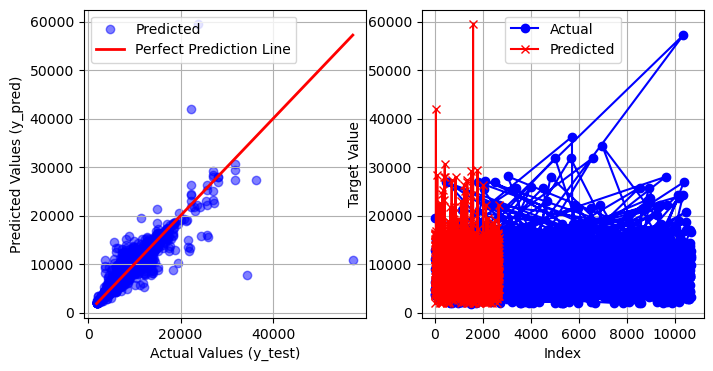

In [22]:
plot_and_pred_train(X_train, X_test, y_train, y_test, model = rfr, model_path = model_path_rfr)

In [20]:
#--------------------3. Adaboost regressor
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor()

In [24]:
model_path_abr = '../../saved_models/trees/abr.pkl'
model_path_abr

'../../saved_models/trees/abr.pkl'

r2 score : 0.40622383404825746
MAE : 2670.421622355511
RMSE : 3482.712789368665
MSE : 12129288.373232068


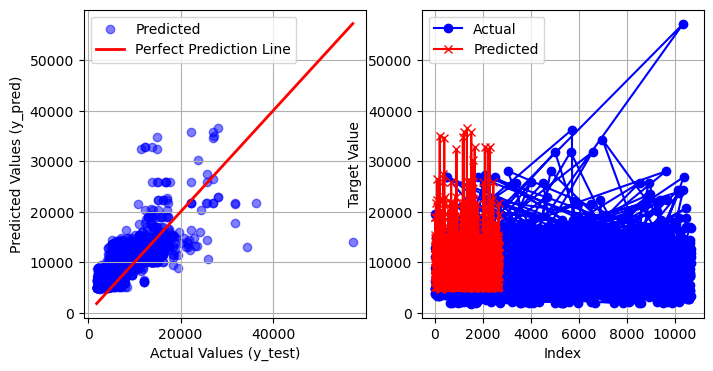

In [25]:
plot_and_pred_train(X_train, X_test, y_train, y_test, model = abr, model_path = model_path_abr)

In [26]:
#-------------------------4. Gradient boost
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [27]:
model_path_gbr = '../../saved_models/trees/gbr.pkl'
model_path_gbr

'../../saved_models/trees/gbr.pkl'

r2 score : 0.7674748195491286
MAE : 1359.2999176944281
RMSE : 2179.4217224790655
MSE : 4749879.044413616


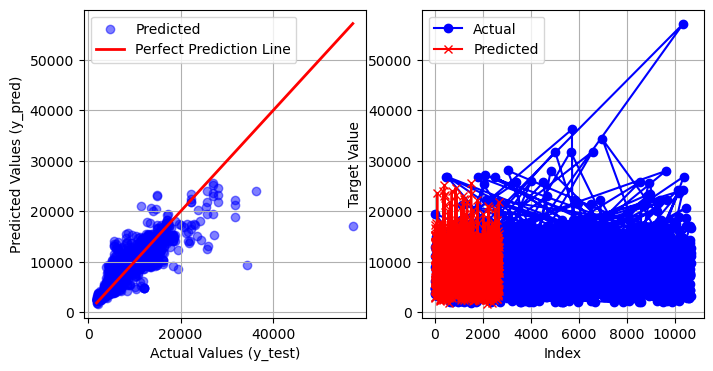

In [28]:
plot_and_pred_train(X_train, X_test, y_train, y_test, model = gbr, model_path = model_path_gbr)

### --------------predictions and eval : test data----------------

In [29]:
### for the eval data aka test data, I will pick the best model from above 4 and 
### then predict using it for the first time and then use it for the comparison

In [30]:
#-------------best model is Random forest (rfr)

In [32]:
#-------------predictions using the best model
y_pred_best = best_model_pred(X_eval, best_model_path = model_path_rfr)

In [33]:
#---------veryfying them
y_pred_best

array([14709.23,  4227.97, 12898.  , ..., 15725.15, 13274.51,  7582.32])

##### ------------- comparison vs Random forest ----------------

r2 score : 0.9247725521591073
MAE : 557.4951186331141
RMSE : 1209.9793863325779
MSE : 1464050.1153497614


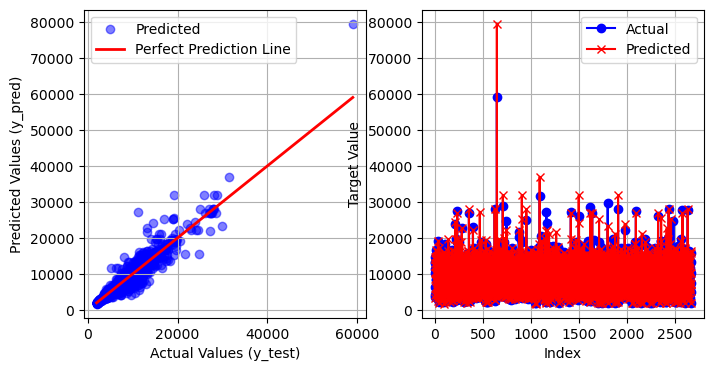

In [34]:
#-----------------1. Decision tree
other_model_pred(X_eval, y_pred_best, other_model_path = model_path_dtr)

r2 score : 0.47792736836194183
MAE : 2502.3440805370037
RMSE : 3187.537266568791
MSE : 10160393.825764839


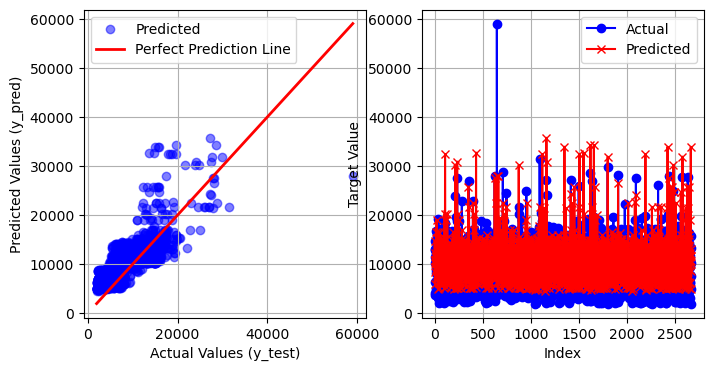

In [35]:
#----------------2. Adaboost
other_model_pred(X_eval, y_pred_best, other_model_path = model_path_abr)

r2 score : 0.8565868035099871
MAE : 1047.8695026944504
RMSE : 1670.645731203819
MSE : 2791057.159189543


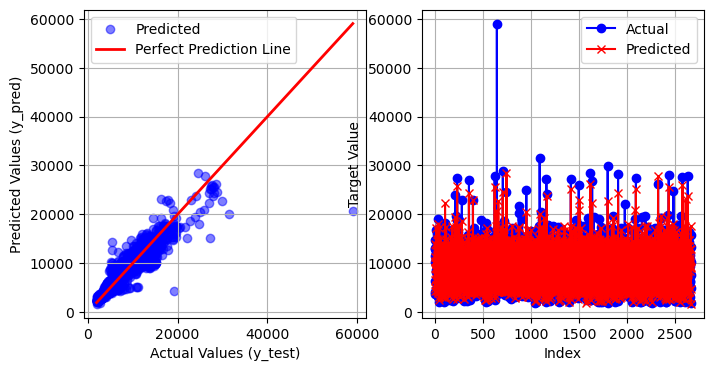

In [36]:
#-----------------3. Gradient boost
other_model_pred(X_eval, y_pred_best, other_model_path = model_path_gbr)